In [20]:
from dotenv import load_dotenv

load_dotenv()

from langgraph.graph import StateGraph, START, END, add_messages
from typing import Annotated


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")
# llm.invoke("Write me a ballad about LangChain")

AIMessage(content="(Verse 1)\nIn realms of code, where data streams,\nAnd knowledge sleeps in silent dreams,\nA hero rose, with purpose bright,\nTo chain the words and shed the light.\nLangChain it was, a noble name,\nTo tame the text and fan the flame,\nOf understanding, deep and vast,\nTo make the future, built to last.\n\n(Verse 2)\nWith LLMs as guiding stars,\nIt broke down tasks behind the bars,\nOf complex thought, a tangled thread,\nAnd wove a path where others fled.\nFrom prompts so grand to agents bold,\nIts power grew a sight to behold,\nWith tools and chains, a craftsman's art,\nTo tear the veil of worlds apart.\n\n(Verse 3)\nIt learned from vectors, dense and deep,\nWhere embeddings held secrets sleep,\nAnd memories, both long and short,\nTo fuel the engines of its court.\nIt queried databases unseen,\nAnd parsed the webs, both bright and keen,\nTo gather knowledge, far and wide,\nWith every answer as its guide.\n\n(Verse 4)\nBut challenges arose, you see,\nWith biases lurk

In [ ]:
from pydantic import BaseModel

class State(BaseModel):
    messages: Annotated[list, add_messages]

In [22]:
def chatbot(state: State) -> State:
    data = {"messages": [llm.invoke(state.messages)]}
    obj = State(**data)
    return obj

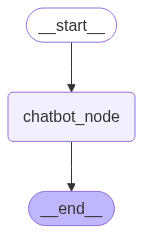

In [23]:
builder = StateGraph(State)

builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()
graph

In [24]:
query = {"messages": [{"role": "user", "content": "Who is first prime minister of India?"}]}
obj = State(**query) 

response = graph.invoke(obj)
response

{'messages': [HumanMessage(content='Who is first prime minister of India?', additional_kwargs={}, response_metadata={}, id='7b65c710-224d-4339-bb02-3f4587b0daef'),
  AIMessage(content='The first Prime Minister of India was **Jawaharlal Nehru**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-001', 'safety_ratings': []}, id='run--41697a28-f83d-43a1-91d4-ae8c3f3c80f2-0', usage_metadata={'input_tokens': 8, 'output_tokens': 14, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}})]}

In [29]:
state = None

while True:
    input_message = input("Query: ")

    if input_message.lower() in {"quit", "exit"}:
        break

    if state is None:
        query = {"messages": [{"role": "user", "content": input_message}]}
        state = State(**query)
    else:
        state.messages.append({"role": "user", "content": input_message})

    # Invoke the graph and re-wrap the output back into State
    output = graph.invoke(state)
    state = State(**output)  # Convert dict back to State model

    print("Query: ", input_message)
    print("Response: ", state.messages[-1].content) 
    print()


Query:  define operating system in one sentence.
Response:  An operating system is a software that manages computer hardware and software resources and provides common services for computer programs.

Query:  what are its examples?
Response:  Here are some examples of operating systems:

*   **Windows:** A family of proprietary operating systems developed by Microsoft. (e.g., Windows 10, Windows 11, Windows Server)
*   **macOS:** A proprietary operating system developed by Apple for its Macintosh computers. (e.g., macOS Ventura, macOS Monterey)
*   **Linux:** An open-source operating system kernel that forms the basis of many distributions. (e.g., Ubuntu, Fedora, Debian, Red Hat Enterprise Linux, Android)
*   **Android:** A mobile operating system based on the Linux kernel, primarily developed by Google.
*   **iOS:** A mobile operating system developed by Apple for its iPhone, iPad, and iPod Touch devices.
*   **Chrome OS:** A lightweight operating system based on the Linux kernel, des